In [134]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel('dados_n4_a4_itp.xlsx')

In [135]:
q_nan = df['Q']
q = q_nan[~np.isnan(q_nan)]
mu, std = norm.fit(q)

In [157]:
x = np.linspace(2, 8, 100)
y = norm.pdf(x, mu, std)

In [158]:
q_hist = np.histogram(q, density=True, bins=100)
residuals = []
for density, qi in zip(*q_hist):
    yi = norm.pdf(qi, mu, std) 
    residuals.append(density-yi)

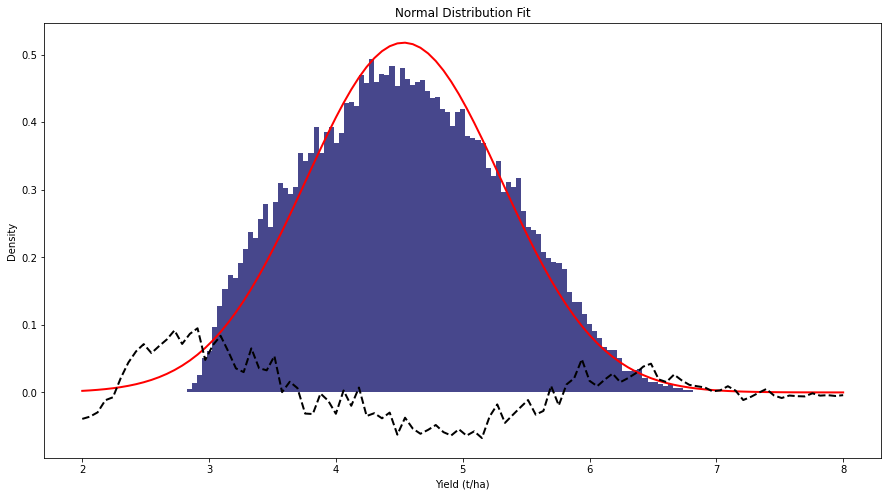

In [159]:
fig, ax = plt.subplots(figsize = (15,8))

ax.hist(q, bins=100, density=True, color='midnightblue', alpha=0.8)
ax.plot(x, y, color='red', linewidth=2)
ax.set_title('Normal Distribution Fit')
ax.set_xlabel('Yield (t/ha)')
ax.set_ylabel('Density')

ax.plot(x, residuals, color='black', linestyle='dashed', linewidth=2)